In [8]:
import torch
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pickle

In [9]:
# Define some values for telescope positions
COPos_UTM = np.array([445343.8,6114140.0,1712.3])
HEPos_UTM = np.array([445498.14,6114209.8, 1707.34])

COPos = np.array([-31895.75932067,  15026.12801882,    214.90194976])
HEPos = np.array([-31741.12427975,  15095.57420328,    210.54774754])




CO_BackwallAngle = 243.0219        
CO_OpticalAxisPhi   = {1:14.8,2:44.92,3:74.93,4:105.04,5:134.89,6:165.2}
CO_OpticalAxisTheta = {1:16.03,2:14.14,3:16.02,4:16.20,5:16.09,6:16.15 }

HE_BackwallAngle = 273.0
HE_OpticalAxisPhi   = {1:44.45,2:89.87,3:132.83}
HE_OpticalAxisTheta = {1:44.45,2:45.58,3:44.85}


In [10]:
# Load in the saved geometry data
with open('All_GE_GEOM.pkl', 'rb') as f:
    ALL_GE_GEOM = pickle.load(f)

with open('All_HE_GEOM.pkl', 'rb') as f:
    ALL_HE_GEOM = pickle.load(f)

with open('All_HC_GEOM.pkl', 'rb') as f:
    ALL_HC_GEOM = pickle.load(f)




In [11]:
# Gen Data has Core and Axis
ALL_GE_GEOM_Core = [Ev['Core'] for Ev in ALL_GE_GEOM]
ALL_GE_GEOM_Axis = [Ev['Axis'] for Ev in ALL_GE_GEOM]

ALL_GE_GEOM_Core = np.array(ALL_GE_GEOM_Core)
ALL_GE_GEOM_Axis = np.array(ALL_GE_GEOM_Axis)

# Telescope Data has SDP_Theta, SDP_Phi, Chi0 and Rp
ALL_HE_GEOM_Theta = [Ev['SDP_Theta'] for Ev in ALL_HE_GEOM]
ALL_HE_GEOM_Phi   = [Ev['SDP_Phi'  ] for Ev in ALL_HE_GEOM]
ALL_HE_GEOM_Chi0  = [Ev['Chi0'     ] for Ev in ALL_HE_GEOM]
ALL_HE_GEOM_Rp    = [Ev['Rp'       ] for Ev in ALL_HE_GEOM]

ALL_HE_GEOM_Theta = np.array(ALL_HE_GEOM_Theta)
ALL_HE_GEOM_Phi   = np.array(ALL_HE_GEOM_Phi  )
ALL_HE_GEOM_Chi0  = np.array(ALL_HE_GEOM_Chi0 )
ALL_HE_GEOM_Rp    = np.array(ALL_HE_GEOM_Rp   )

ALL_HC_GEOM_Theta = [Ev['SDP_Theta'] for Ev in ALL_HC_GEOM]
ALL_HC_GEOM_Phi   = [Ev['SDP_Phi'  ] for Ev in ALL_HC_GEOM]
ALL_HC_GEOM_Chi0  = [Ev['Chi0'     ] for Ev in ALL_HC_GEOM]
ALL_HC_GEOM_Rp    = [Ev['Rp'       ] for Ev in ALL_HC_GEOM]

ALL_HC_GEOM_Theta = np.array(ALL_HC_GEOM_Theta)
ALL_HC_GEOM_Phi   = np.array(ALL_HC_GEOM_Phi  )
ALL_HC_GEOM_Chi0  = np.array(ALL_HC_GEOM_Chi0 )
ALL_HC_GEOM_Rp    = np.array(ALL_HC_GEOM_Rp   )





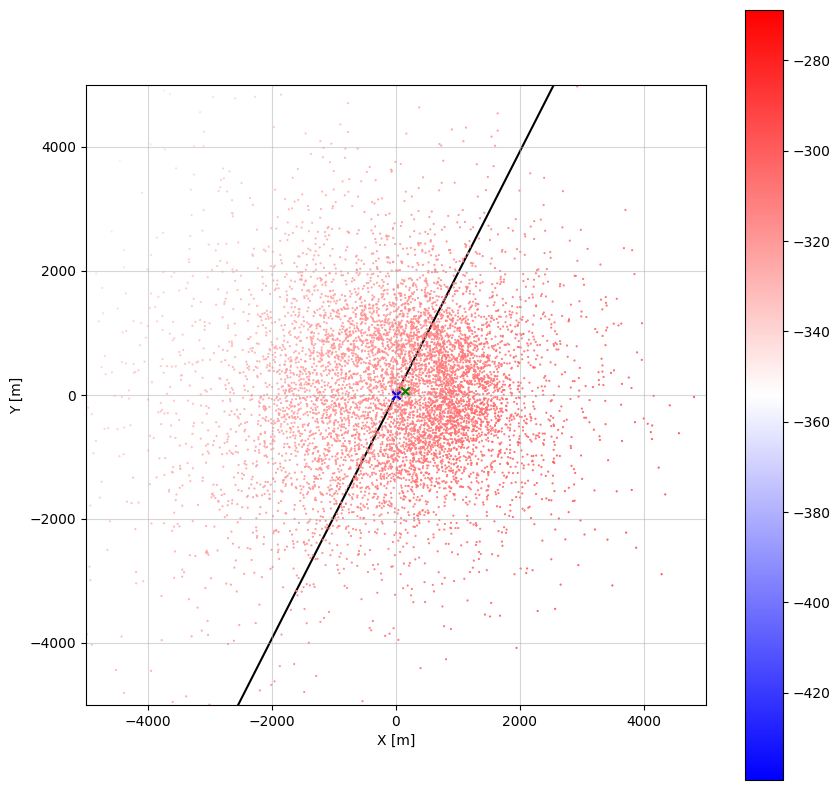

In [12]:
# Plot Core X,Y positions relative to the CO telescope
X = ALL_GE_GEOM_Core[:,0] - COPos[0]
Y = ALL_GE_GEOM_Core[:,1] - COPos[1]
HE_rel = np.array([HEPos[0] - COPos[0], HEPos[1] - COPos[1]])
plt.figure(figsize=(10,10))
plt.scatter(X,Y, label='GE Core', marker='.',s= 1 ,c = ALL_GE_GEOM_Core[:,2]-COPos[2], cmap='bwr')
plt.colorbar()
plt.scatter(0,0, color='blue', label='CO Telescope', marker='x')
plt.scatter(HE_rel[0], HE_rel[1], color='green', label='HE Telescope', marker='x')
# Draw the array border with the CO position and backwall angle
theta = np.radians(CO_BackwallAngle)  # If CO_BackwallAngle is in degrees

# Get plot limits
xlim = [-10000, 10000]  # Adjust as needed
ylim = [-10000, 10000]  # Adjust as needed
x1, y1 = xlim[0], np.tan(theta) * xlim[0]
x2, y2 = xlim[1], np.tan(theta) * xlim[1]
# Clip to y-limits
if y1 < ylim[0] or y2 > ylim[1]:  # Ensure it doesn't go out of bounds
    y1, x1 = ylim[0], ylim[0] / np.tan(theta)
    y2, x2 = ylim[1], ylim[1] / np.tan(theta)
plt.plot([x1, x2], [y1, y2], 'k', label="Backwall Line", zorder =-100)



plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.xlim(-5000,5000)
plt.ylim(-5000,5000)
# Set equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(alpha = 0.5)

## Lets find the geometry in HE reference frame from the Core/Axis measurements

In [23]:
# Convert Variables 
CoreDir = ALL_GE_GEOM_Core - HEPos[np.newaxis,:]
CoreDir = CoreDir/np.linalg.norm(CoreDir,axis = 1, keepdims= True)

Axis = -ALL_GE_GEOM_Axis
Axis = Axis/np.linalg.norm(Axis,axis = 1, keepdims= True)

SDPVect = np.cross(CoreDir,Axis)
# SDPVect = SDPVect/np.linalg.norm(SDPVect,axis = 1, keepdims= True)

SDP_Phi   = np.arctan2(SDPVect[:,1],SDPVect[:,0])
SDP_Theta = np.arccos(SDPVect[:,2])

# Renormalise Phi
SDP_Phi = SDP_Phi - HE_BackwallAngle/180*np.pi
SDP_Phi[SDP_Phi < -np.pi] += 2*np.pi
SDP_Phi[SDP_Phi > np.pi] -= 2*np.pi


# Find The SDP errors
ALL_SDP_Theta_Err = ALL_HE_GEOM_Theta - SDP_Theta
ALL_SDP_Phi_Err   = ALL_HE_GEOM_Phi   - SDP_Phi

# Reduce the errors over 2pi
ALL_SDP_Phi_Err[ALL_SDP_Phi_Err > np.pi] -= 2*np.pi
ALL_SDP_Theta_Err[ALL_SDP_Theta_Err > np.pi] -= 2*np.pi

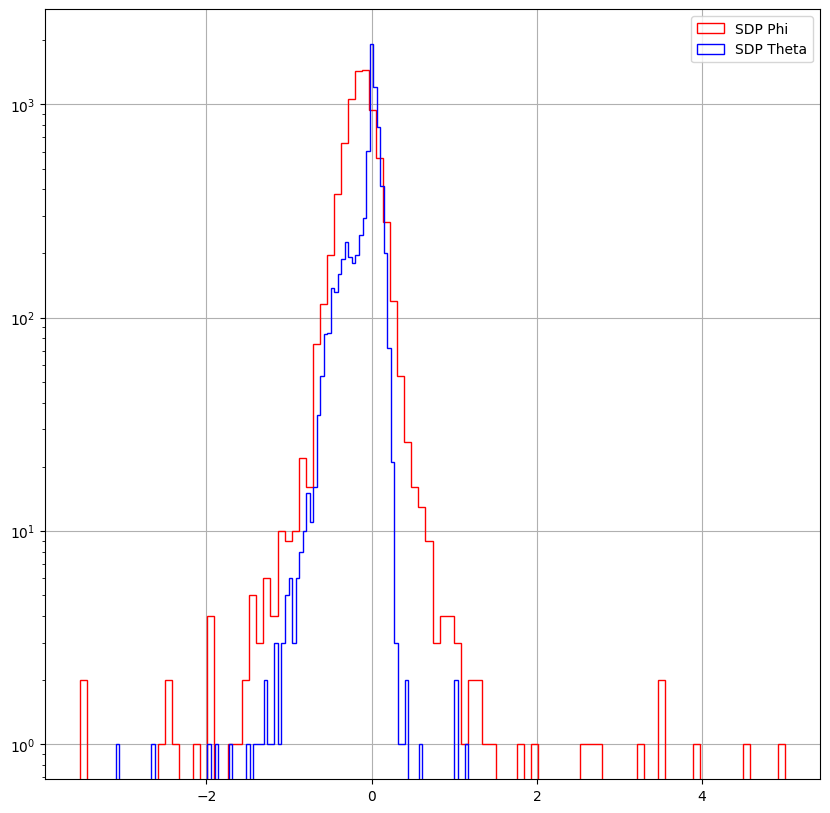

In [15]:
#Simple histogram of the errors
plt.figure(figsize=(10,10))
plt.hist(ALL_SDP_Phi_Err  *180/np.pi, bins = 100, histtype='step', color='red', label='SDP Phi')
plt.hist(ALL_SDP_Theta_Err*180/np.pi, bins = 100, histtype='step', color='blue', label='SDP Theta')
plt.legend()
plt.yscale('log')
# plt.xlim(-2,2)
plt.grid()

## Now we can make the same plot but using the Errors in a variable as the color

In [16]:
# Colormap Truncation
from matplotlib.colors import LinearSegmentedColormap

# Create a truncated version of the inferno colormap (first 90%)
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        f'truncated_{cmap.name}', 
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

# Original inferno colormap
inferno = plt.get_cmap('inferno_r')

# Truncated colormap: first 90%
truncated_inferno = truncate_colormap(inferno, 0.05, 1)


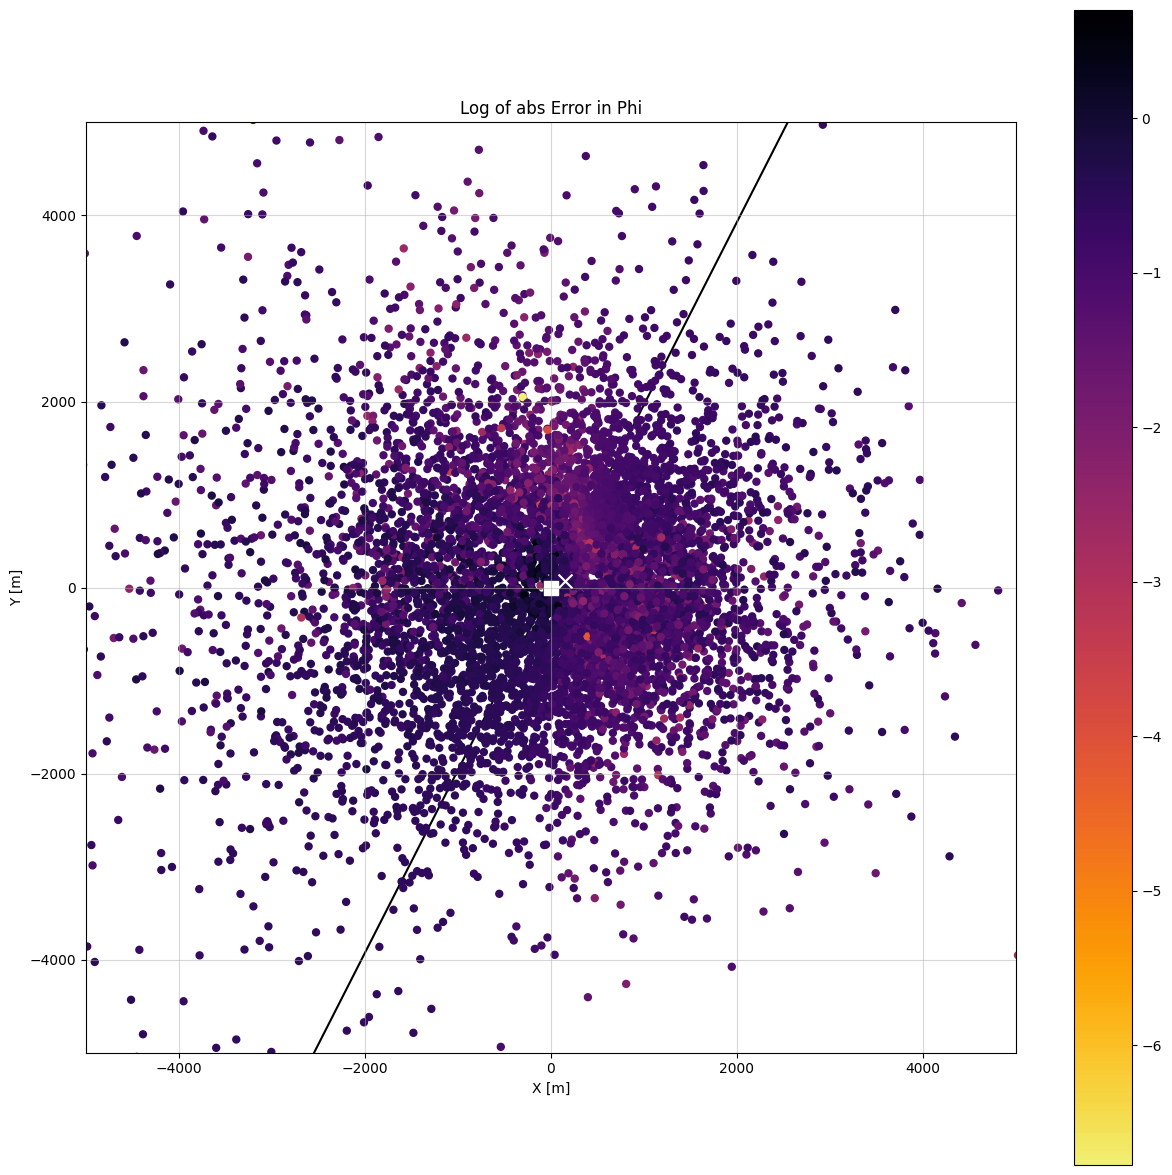

In [17]:
# Plot Core X,Y positions relative to the CO telescope
X = ALL_GE_GEOM_Core[:,0] - COPos[0]
Y = ALL_GE_GEOM_Core[:,1] - COPos[1]

Color = np.log10(np.abs(ALL_SDP_Phi_Err*180/np.pi))

HE_rel = np.array([HEPos[0] - COPos[0], HEPos[1] - COPos[1]])
plt.figure(figsize=(15,15))
plt.scatter(X,Y, label='GE Core', marker='.',s= 100, c = Color, cmap = truncated_inferno)
plt.colorbar()

plt.scatter(0,0,                  color='white', label='CO Telescope', marker='s',s=100)
plt.scatter(HE_rel[0], HE_rel[1], color='white', label='HE Telescope', marker='x',s=100)
# Draw the array border with the CO position and backwall angle
theta = np.radians(CO_BackwallAngle)  # If CO_BackwallAngle is in degrees

# Get plot limits
xlim = [-10000, 10000]  # Adjust as needed
ylim = [-10000, 10000]  # Adjust as needed
x1, y1 = xlim[0], np.tan(theta) * xlim[0]
x2, y2 = xlim[1], np.tan(theta) * xlim[1]
# Clip to y-limits
if y1 < ylim[0] or y2 > ylim[1]:  # Ensure it doesn't go out of bounds
    y1, x1 = ylim[0], ylim[0] / np.tan(theta)
    y2, x2 = ylim[1], ylim[1] / np.tan(theta)
plt.plot([x1, x2], [y1, y2], 'k', label="Backwall Line", zorder =-100)

plt.title('Log of abs Error in Phi')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.xlim(-5000,5000)
plt.ylim(-5000,5000)
# Set equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(alpha = 0.5)

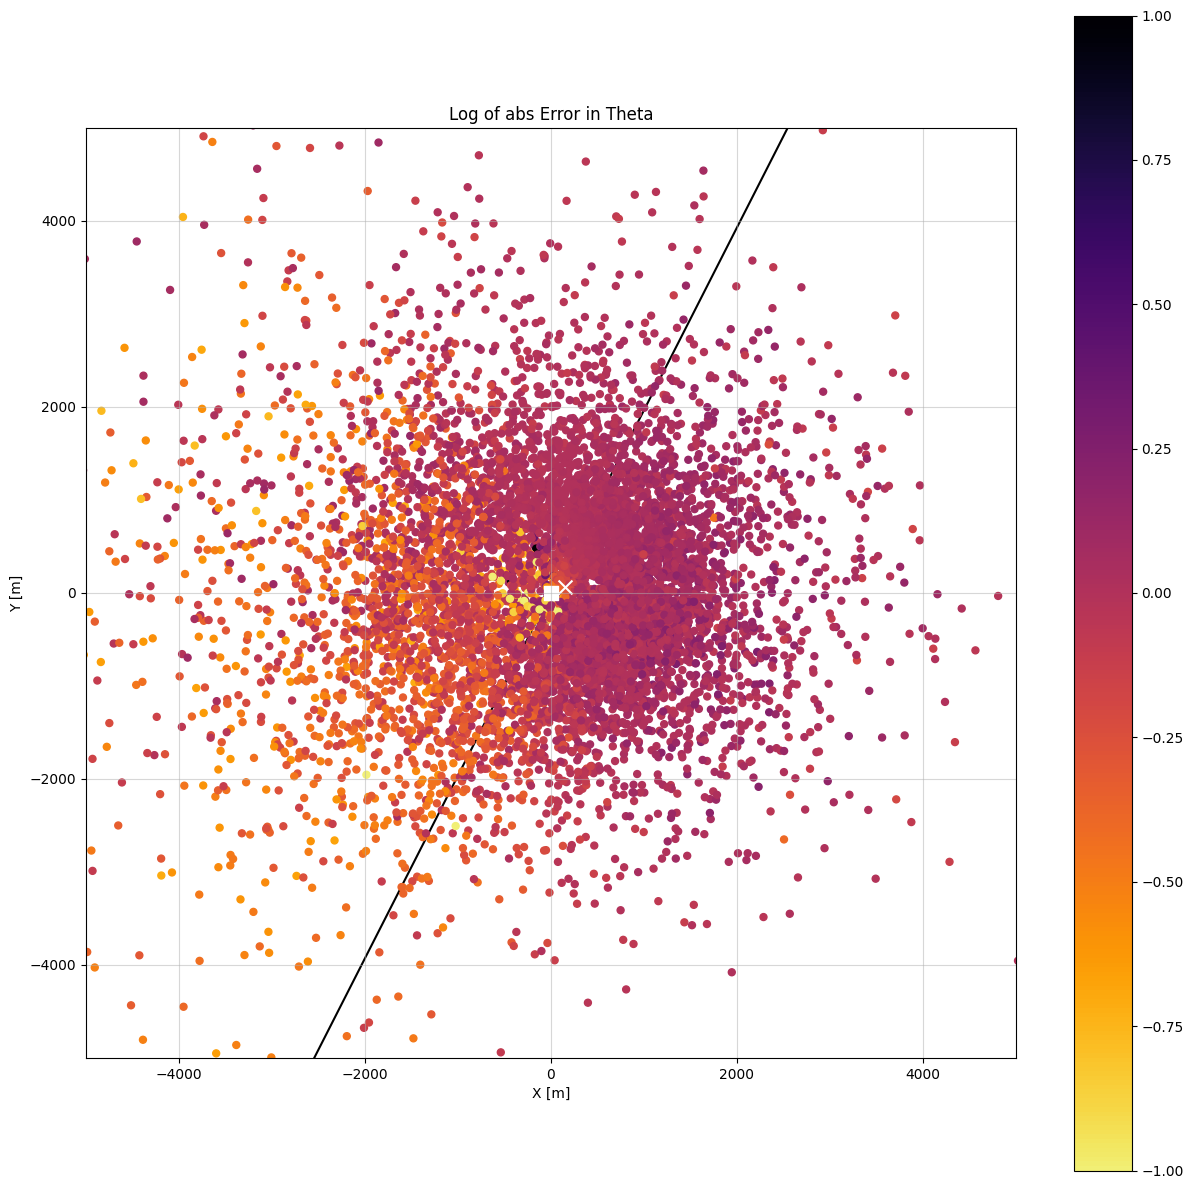

In [18]:
# Plot Core X,Y positions relative to the CO telescope
X = ALL_GE_GEOM_Core[:,0] - COPos[0]
Y = ALL_GE_GEOM_Core[:,1] - COPos[1]

Color = (ALL_SDP_Theta_Err*180/np.pi).clip(-1,1)

HE_rel = np.array([HEPos[0] - COPos[0], HEPos[1] - COPos[1]])
plt.figure(figsize=(15,15))
plt.scatter(X,Y, label='GE Core', marker='.',s= 100, c = Color, cmap = truncated_inferno)
plt.colorbar()

plt.scatter(0,0,                  color='white', label='CO Telescope', marker='s',s=100)
plt.scatter(HE_rel[0], HE_rel[1], color='white', label='HE Telescope', marker='x',s=100)
# Draw the array border with the CO position and backwall angle
theta = np.radians(CO_BackwallAngle)  # If CO_BackwallAngle is in degrees

# Get plot limits
xlim = [-10000, 10000]  # Adjust as needed
ylim = [-10000, 10000]  # Adjust as needed
x1, y1 = xlim[0], np.tan(theta) * xlim[0]
x2, y2 = xlim[1], np.tan(theta) * xlim[1]
# Clip to y-limits
if y1 < ylim[0] or y2 > ylim[1]:  # Ensure it doesn't go out of bounds
    y1, x1 = ylim[0], ylim[0] / np.tan(theta)
    y2, x2 = ylim[1], ylim[1] / np.tan(theta)
plt.plot([x1, x2], [y1, y2], 'k', label="Backwall Line", zorder =-100)

plt.title('Log of abs Error in Theta')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.xlim(-5000,5000)
plt.ylim(-5000,5000)
# Set equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(alpha = 0.5)

Text(0.5, 0, 'HE Phi [deg]')

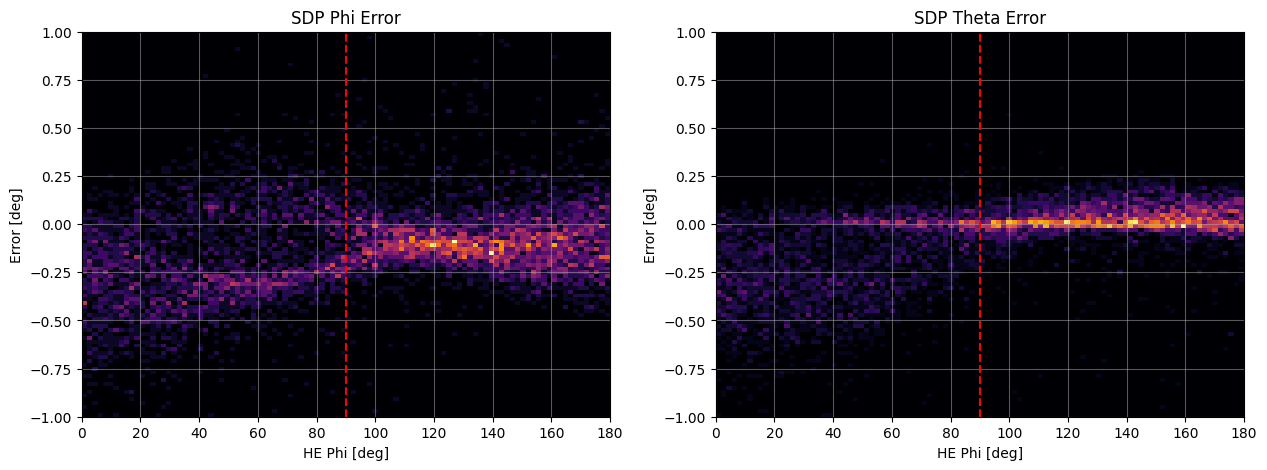

In [19]:
# Plot the Errors in the SDP sdp vs True HE Phi
fig,axs = plt.subplots(1,2, figsize=(15,5))
# axs[0].scatter(np.abs(ALL_HE_GEOM_Phi*180/np.pi), ALL_SDP_Phi_Err*180/np.pi, label='SDP Phi Error', marker='.')
axs[0].hist2d(np.abs(ALL_HE_GEOM_Phi*180/np.pi), ALL_SDP_Phi_Err*180/np.pi, bins = 100,range = [[0,180],[-1,1]], cmap = 'inferno')
axs[0].set_xlim(0,180)
axs[0].axvline(90, color='red', linestyle='--')
axs[0].grid(alpha = 0.5)
axs[0].set_title('SDP Phi Error')
axs[0].set_ylabel('Error [deg]')
axs[0].set_xlabel('HE Phi [deg]')



# axs[1].scatter(np.abs(ALL_HE_GEOM_Phi*180/np.pi), ALL_SDP_Theta_Err*180/np.pi, label='SDP Theta Error', marker='.')
axs[1].hist2d(np.abs(ALL_HE_GEOM_Phi*180/np.pi), ALL_SDP_Theta_Err*180/np.pi, bins = 100,range = [[0,180],[-1,1]], cmap = 'inferno')
axs[1].set_xlim(0,180)
axs[1].axvline(90, color='red', linestyle='--')
axs[1].grid(alpha = 0.5)
axs[1].set_title('SDP Theta Error')
axs[1].set_ylabel('Error [deg]')
axs[1].set_xlabel('HE Phi [deg]')

Text(0.5, 0, 'HE Phi [deg]')

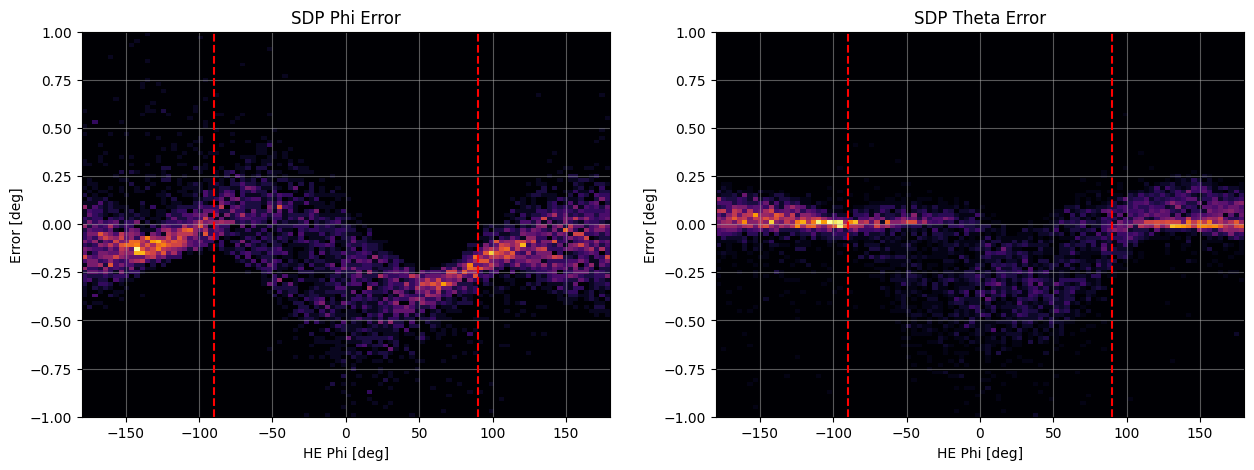

In [20]:
# Plot the Errors in the SDP sdp vs True HE Phi
fig,axs = plt.subplots(1,2, figsize=(15,5))
# axs[0].scatter(np.abs(ALL_HE_GEOM_Phi*180/np.pi), ALL_SDP_Phi_Err*180/np.pi, label='SDP Phi Error', marker='.')
axs[0].hist2d((ALL_HE_GEOM_Phi*180/np.pi), ALL_SDP_Phi_Err*180/np.pi, bins = 100,range = [[-180,180],[-1,1]], cmap = 'inferno')
axs[0].set_xlim(-180,180)
axs[0].axvline(90, color='red', linestyle='--')
axs[0].axvline(-90, color='red', linestyle='--')
axs[0].grid(alpha = 0.5)
axs[0].set_title('SDP Phi Error')
axs[0].set_ylabel('Error [deg]')
axs[0].set_xlabel('HE Phi [deg]')



# axs[1].scatter(np.abs(ALL_HE_GEOM_Phi*180/np.pi), ALL_SDP_Theta_Err*180/np.pi, label='SDP Theta Error', marker='.')
axs[1].hist2d((ALL_HE_GEOM_Phi*180/np.pi), ALL_SDP_Theta_Err*180/np.pi, bins = 100,range = [[-180,180],[-1,1]], cmap = 'inferno')
axs[1].set_xlim(-180,180)
axs[1].axvline(90, color='red', linestyle='--')
axs[1].axvline(-90, color='red', linestyle='--')
axs[1].grid(alpha = 0.5)
axs[1].set_title('SDP Theta Error')
axs[1].set_ylabel('Error [deg]')
axs[1].set_xlabel('HE Phi [deg]')